<h1><center>Práctica 7</center></h1>
<h2><center>Analisis de la imagen</center></h2>

In [3]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
%matplotlib notebook

En esta práctica se pretende familiarizar al alumno con las herramientas avanzadas de procesado morfológico de imagen en entorno MATLAB. Para ello se trabajará con la imagen ‘I_celulas.bmp’, imagen en escala de grises (uint8) procedente de un microscopio. En esta práctica se aplicarán herramientas avanzadas de segmentación y morfología matemática para realizar el conteo de células de forma automática, a la vez que se delimitan sus fronteras. Se trata de una aplicación bastante útil para monitorizar la velocidad de reproducción de células vivas, siendo una alternativa al proceso de conteo por inspección visual. Tenga en cuenta la dificultad de segmentar todas las células, especialmente si los núcleos aparecen superpuestos en la imagen. 
 
Para conocer el funcionamiento de los comandos utilizados en este guión, utilice la ayuda de MATLAB. Tenga en cuenta que a lo largo de la práctica puede utilizar las instrucciones clear all y close all para evitar posibles interferencias con otras variables o ventanas. 
 
Para realizar el diseño del sistema, se sugiere seguir los siguientes pasos: 
 

<IPython.core.display.Javascript object>


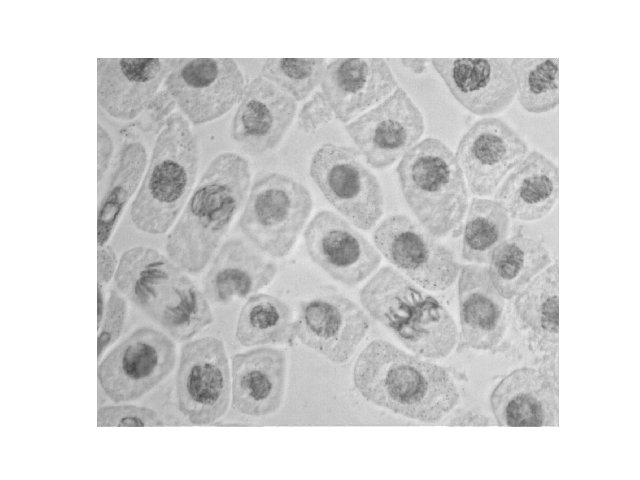

In [4]:
I = cv2.imread('cells.jpg', 0)

plt.figure(1)
plt.imshow(I, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

1. Preprocesado 
 
Realice un filtrado de la imagen aplicando un filtro alternado secuencial (ASF3) open-close con un EE plano que corresponda a un disco. Utilice discos de tamaño creciente (radio 1, radio 2 y radio 3). Incluya en la memoria la secuencia de instrucciones utilizada y la secuencia de imágenes obtenida tras aplicar cada una de las etapas del ASF3. Denotaremos a la variable que almacena la imagen resultante como ‘I_ASF3’. Comente los resultados obtenidos.  
 
Comandos MATLAB a utilizar: strel, imopen, imclose. 

<IPython.core.display.Javascript object>


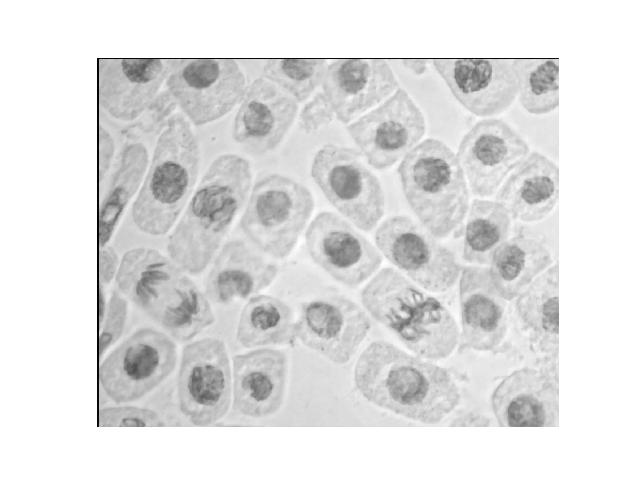

In [5]:
EE1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
EE2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
EE3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))


open1 = cv2.morphologyEx(I, cv2.MORPH_OPEN, EE1)
clos1 = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, EE1)
open2 = cv2.morphologyEx(clos1, cv2.MORPH_OPEN, EE2)
clos2 = cv2.morphologyEx(open2, cv2.MORPH_CLOSE, EE2)
open3 = cv2.morphologyEx(clos2, cv2.MORPH_OPEN, EE3)
I_ASF3 = cv2.morphologyEx(open3, cv2.MORPH_CLOSE, EE3)

plt.figure(2)
plt.imshow(I_ASF3, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

2. Segmentación por watershed 
 
Para realizar la segmentación haremos uso de la técnica watershed con marcadores, utilizando un marcador por célula y otro marcador externo para el fondo

a. Obtención de los marcadores de célula 
 
Puesto que el marcador de cada célula debe ser interno a la misma, se considerará  como marcador la parte interna “oscura” de la célula. Para su extracción se propone seguir el siguiente proceso: i. Obtener el negativo de ‘I_ASF3’ ⇒ ‘I_neg’ ii. Erosionar ‘I_neg’ con un EE plano correspondiente a un disco de radio 9 ⇒ ‘I_marker’ iii. Reconstrucción de I_neg utilizando como marcador ‘I_marker’ ⇒ ‘I_rec’ iv. Obtención de una imagen binaria donde los píxeles de primer plano indiquen los máximos regionales de ‘I_rec’ ⇒ ‘I_max_reg’ 
 
 

<IPython.core.display.Javascript object>


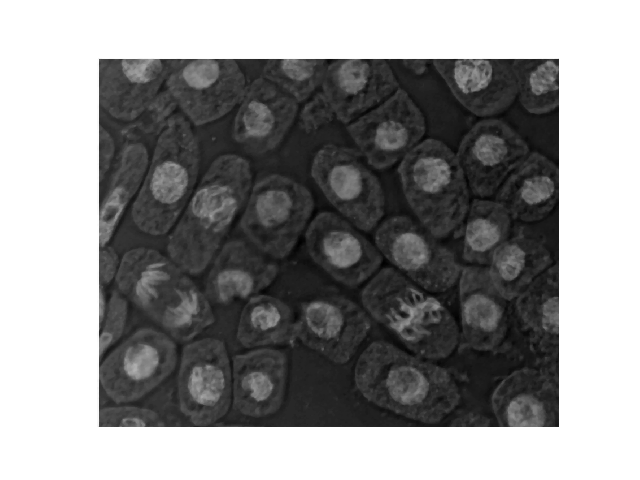

In [6]:
I_neg = 255 - I_ASF3

plt.figure('neg')
plt.imshow(I_neg, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


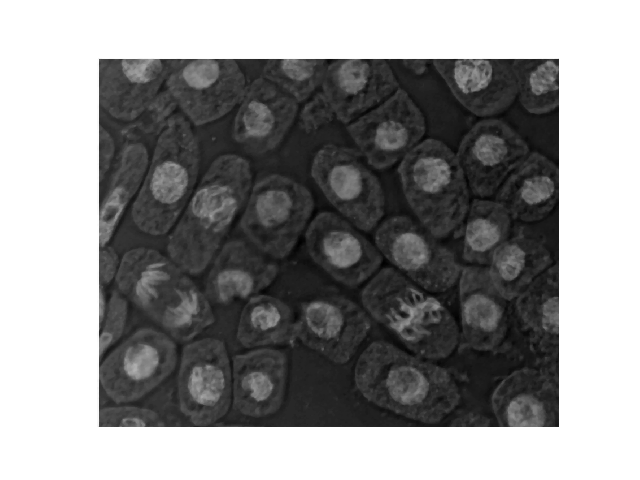

In [11]:
EEnuevo = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))

I_marker = cv2.erode(I_neg,EEnuevo,iterations = 1)

plt.figure('erosion')
plt.imshow(I_neg, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Probando otra forma no usa reconstruccion

<IPython.core.display.Javascript object>


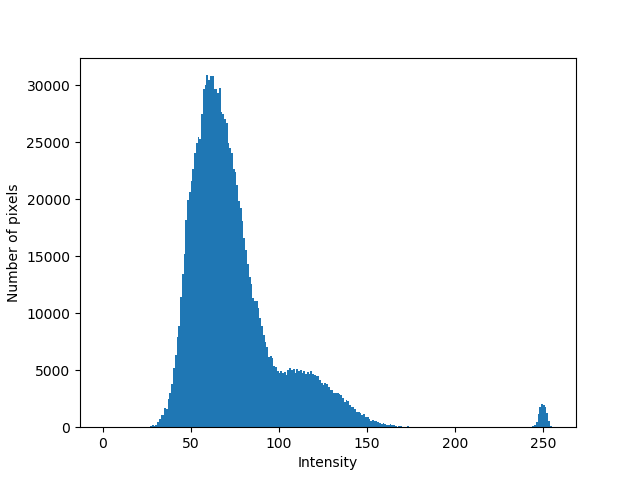

<IPython.core.display.Javascript object>


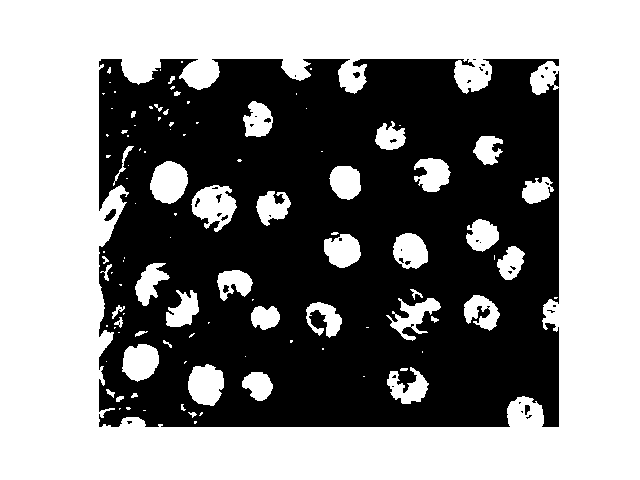

In [9]:

plt.figure('Histogram')
plt.hist(I_neg.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

[thresh, binary] = cv2.threshold(I_neg, 238, 1, cv2.THRESH_OTSU)

plt.figure('binary')
plt.imshow(binary, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

La relación de comandos MATLAB que debe utilizar es: imcomplement, imreconstruct, imregionalmax. Utilizando los nombres de las variables que se indican en cada paso, indique la secuencia de comandos utilizada en cada paso y represente cada una de las imágenes resultantes. Comente brevemente cada uno de los resultados. 

De la comparación visual entre la imagen de células original (‘I_celulas’) y la imagen ‘I_max_reg’, se observa que no todos los máximos regionales obtenidos son útiles. A simple vista, ¿qué grupos de píxeles indicadores de máximos habría que eliminar? Haga uso del comando imclearborder para conseguirlo. Represente la imagen resultante y la instrucción utilizada. Denomine ‘I_max_reg2’ a la variable que almacena la imagen resultante

Compare visualmente las imágenes ‘I_celulas’ e ‘I_max_reg2’. Observará que en ‘I_max_reg2’ aparecen marcadas regiones que no corresponden a células. Para eliminar estas regiones tendremos en cuenta que el nivel medio de intensidad de ‘I_celulas’ en las zonas de interés marcadas por ‘I_max_reg2’ es superior en las zonas a eliminar que en el interior de las células. Consideraremos 150 como el valor de intensidad umbral para determinar si el mínimo regional corresponde o no al interior de una célula. Para eliminar las regiones de ‘I_max_reg2’ que no cumplan esta restricción utilizaremos la siguiente secuencia de instrucciones:   cc = bwconncomp(I_max_reg2); stats = regionprops(cc,I_celulas, 'MeanIntensity'); idx = find([stats.MeanIntensity] <150); I_max_reg3 = ismember(labelmatrix(cc), idx); 

Explique razonadamente qué hace cada una de las instrucciones anteriores. Incluya en la memoria la nueva imagen ‘I_max_reg3’ y justifique las diferencias con ‘I_max_reg2’. Tenga en cuenta que las regiones de primer plano de ‘I_max_reg3’ actuarán como marcadores interiores en la segmentación por watershed. 
 
 
Proponga un procedimiento para determinar automáticamente el número de células a partir de la imagen ‘I_max_reg3’. 

b. Obtención del marcador externo 
 
Como marcador externo utilizaremos las líneas de watershed obtenidas sobre la función distancia de  ‘I_max_reg3’, previamente dilatada con un disco de radio 7 para intentar que los marcadores externos no correspondan a zonas de la célula. Utilice la siguiente secuencia de instrucciones para obtener una primera aproximación a este marcador: 
 
I_dilate = imdilate(logical(I_max_reg3),strel('disk',7)); D = bwdist(I_ dilate); DL = watershed(D); bgm = (DL == 0); 
 
Explique conceptualmente el procedimiento utilizado. Para ello, haga uso de la ayuda de MATLAB y represente en 3D cada una de las variables obtenidas en una figura (comando mesh).  

Utilice las instrucciones 
 
figure, imshow(imadd(255*uint8(bgm),I_celulas)) 
 
para representar en una nueva figura el marcador externo superpuesto a la imagen a segmentar.  
 
 

c. Combine en la misma imagen los marcadores internos y el marcador externo. Utilice para ello la instrucción  
 
I_minimos = bgm | I_max_reg3; 

d. Puesto que aplicaremos la técnica de watershed sobre el módulo del gradiente de la imagen original, el siguiente paso es obtener la correspondiente variable asociada (variable que denominaremos ‘I_celulas_grad’). Incluya en la memoria la secuencia de comandos utilizada para obtenerla, así como su representación en una imagen. 
 
 

e. Como se indicó en las clases teóricas, puesto que la segmentación por watershed parte de los mínimos regionales de la imagen gradiente, el resultado puede conducir  a sobresegmentación. Esto se puede evitar reduciendo el número de mínimos regionales y forzando a que éstos sean los marcadores previamente extraídos. Es por ello que el siguiente paso es imponer como únicos mínimos regionales las regiones de primer plano de ‘I_minimos’, obteniendo como resultado la imagen ‘I_celulas_grad_mrk’. Este proceso se realiza a través del comando imimposemin. Haga uso de la ayuda de este comando e indique en la memoria la instrucción utilizada

f. Aplique la técnica de segmentación por watershed a la imagen ‘I_celulas_grad_mrk’ y extraiga las líneas de watershed, representándolas como regiones de primer plano en la variable ‘L_frontera’. Incluya y justifique la secuencia de comandos utilizada. 

g. Por último, superponga la imagen ‘L_frontera’ a la imagen de partida. Incluya en la memoria la imagen resultante y coméntela